In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

# Introduction to Natural Language Processing

# Table of Contents
* [Introduction to Natural Language Processing](#Introduction-to-Natural-Language-Processing)
	* &nbsp;
		* [Learning Outcomes](#Learning-Outcomes)
* [NLP Basics](#NLP-Basics)
	* &nbsp;
		* [What is NLP?](#What-is-NLP?)
		* [Why is NLP useful?](#Why-is-NLP-useful?)
		* [What are some of the higher level task areas?](#What-are-some-of-the-higher-level-task-areas?)
		* [What are some of the lower level components?](#What-are-some-of-the-lower-level-components?)
		* [Why is NLP hard?](#Why-is-NLP-hard?)
		* [How does NLP work?](#How-does-NLP-work?)
		* [What areas of NLP have we mostly solved?](#What-areas-of-NLP-have-we-mostly-solved?)
		* [What areas of NLP are we making progress in?](#What-areas-of-NLP-are-we-making-progress-in?)
		* [What areas of NLP are we still struggling with?](#What-areas-of-NLP-are-we-still-struggling-with?)
* [Natural Language Toolkit (NLTK)](#Natural-Language-Toolkit-%28NLTK%29)
* [Text Data Acquisition](#Text-Data-Acquisition)
* [Text Preparation](#Text-Preparation)
	* [Processing Unicode Chars](#Processing-Unicode-Chars)
* [Text Tokenization](#Text-Tokenization)
	* [Create a user-defined tokenizer](#Create-a-user-defined-tokenizer)
		* [NLTK Text Object](#NLTK-Text-Object)
	* [Plotting Word Frequencies](#Plotting-Word-Frequencies)
	* [Sentence-level tokenization](#Sentence-level-tokenization)
* [Text Cleaning](#Text-Cleaning)
	* [Non-English Words and Spelling Errors](#Non-English-Words-and-Spelling-Errors)
	* [Stopwords](#Stopwords)
		* [Valid Words Only](#Valid-Words-Only)
		* [WordClouds](#WordClouds)
* [Text Normalisation](#Text-Normalisation)
	* &nbsp;
		* [Stemming](#Stemming)
		* [Lemmatization](#Lemmatization)
* [Text Semantic Analysis](#Text-Semantic-Analysis)
* [Text Sentiment Analysis](#Text-Sentiment-Analysis)
	* &nbsp;
		* [TextBlob - Simplified NLP](#TextBlob---Simplified-NLP)
	* [Sentiment Analysis with TextBlob](#Sentiment-Analysis-with-TextBlob)
* [Text Feature Extraction](#Text-Feature-Extraction)
	* [Collocations and n-grams](#Collocations-and-n-grams)
* [TF-IDF](#TF-IDF)
	* [Document Topic Discovery](#Document-Topic-Discovery)
* [Text Classification](#Text-Classification)
	* [Training a Classifier for Sentiment Classification  From Scratch](#Training-a-Classifier-for-Sentiment-Classification--From-Scratch)
		* [Use default CountVectorizer to train entire dataset first and test it against the training set too](#Use-default-CountVectorizer-to-train-entire-dataset-first-and-test-it-against-the-training-set-too)
		* [Use default CountVectorizer which creates a list of term/frequency features for every review on  a split dataset](#Use-default-CountVectorizer-which-creates-a-list-of-term/frequency-features-for-every-review-on--a-split-dataset)
		* [Use default CountVectorizer with filtered stopwords](#Use-default-CountVectorizer-with-filtered-stopwords)
		* [Use default CountVectorizer with filtered stopwords and select top 100](#Use-default-CountVectorizer-with-filtered-stopwords-and-select-top-100)
		* [Use TF-IDF](#Use-TF-IDF)
		* [Use LDA](#Use-LDA)
		* [Alternative Features Engineering Techinques](#Alternative-Features-Engineering-Techinques)
* [Information Retreival](#Information-Retreival)


---

### Learning Outcomes

At the end of this lecture, you should be able to:

* describe the basic components of conducting NLP
* perform basic operations using the NLTK
* apply algorithms to documents in order to produce summaries
* perform introductory level text analysis

Content in this notebook is based on material in :
>Russell, M. A. (2013). Mining the Social Web: Data Mining Facebook, Twitter, LinkedIn, Google+, GitHub, and More. " O'Reilly Media, Inc.". Chicago

> Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python. " O'Reilly Media, Inc.".

---

In [ ]:
from IPython.core.display import HTML
HTML("<iframe src=http://www.wsj.com/articles/googles-open-source-parsey-mcparseface-helps-machines-understand-english-1463088180 width=1000 height=450></iframe>")

In [ ]:
from IPython.core.display import HTML
HTML("<iframe src=https://www.rt.com/usa/342982-google-artificial-intelligence-software/ width=1000 height=450></iframe>")


http://www.cnet.com/news/google-offers-parsey-mcparseface-and-syntaxnet-ai-software-for-free/

https://research.googleblog.com/2016/05/announcing-syntaxnet-worlds-most.html

# NLP Basics

### What is NLP?

- Using computers to process (analyze, understand, generate) natural human languages

### Why is NLP useful?

- Most knowledge created by humans is unstructured text
 - Need some way to make sense of it
 - Enables quantitative analysis of text data

### What are some of the higher level task areas?

- **Speech recognition and generation**: Apple Siri
     - Speech to text
     - Text to speech
 - **Question answering**: IBM Watson
     - Match query with knowledge base
     - Reasoning about intent of question
 - **Machine translation**: Google Translate
     - One language to another to another
 - **Information retrieval**: Google
     - Finding relevant results
     - Finding similar results
 - **Information extraction**: Gmail
     - Structured information from unstructured documents
 - **Assistive technologies**: Google autocompletion
     - Predictive text input
     - Text simplification
 - **Natural Language Generation**: computer-generated articles
     - Generating text from data
 - **Automatic summarization**: Google News
     - Extractive summarization
     - Abstractive summarization
 - **Sentiment analysis**: Twitter analysis
     - Attitude of speaker

### What are some of the lower level components?

- **Tokenization**: breaking text into tokens (words, sentences, n-grams)
- **Stopword removal**: a/an/the
 - **Stemming and lemmatization**: root word
 - **TF-IDF**: word importance
 - **Part-of-speech tagging**: noun/verb/adjective
 - **Named entity recognition**: person/organization/location
 - **Spelling correction**: "New Yrok City"
 - **Word sense disambiguation**: "buy a mouse"
 - **Segmentation**: "New York City subway"
 - **Language detection**: "translate this page"
 - **Machine learning**

### Why is NLP hard?

- **Ambiguity**:
     - Teacher Strikes Idle Kids
     - Red Tape Holds Up New Bridges
     - Hospitals are Sued by 7 Foot Doctors
     - Juvenile Court to Try Shooting Defendant
     - Local High School Dropouts Cut in Half
 - **Non-standard English**: tweets/text messages
 - **Idioms**: "throw in the towel"
 - **Newly coined words**: "retweet"
 - **Tricky entity names**: "Where is A Bug's Life playing?"
 - **World knowledge**: "Mary and Sue are sisters", "Mary and Sue are mothers"

### How does NLP work?

- Build probabilistic model using data about a language
 - Requires an understanding of the language
 - Requires an understanding of the world (or a particular domain)

### What areas of NLP have we mostly solved?

- spam detection
 - POS detection
 - NER

### What areas of NLP are we making progress in?

- sentiment analysis
 - parsing
 - machine translation
 - information extraction
 - word sense disambiguation

### What areas of NLP are we still struggling with?

- Q&A
 - paraphrasing
 - summarisation
 - unrestrained dialogue

Technologies based on NLP are becoming increasingly widespread. For example,
phones and handheld computers support predictive text and handwriting recognition;
web search engines give access to information locked up in unstructured text and machine
translation. On top of this, with the explosion in social media, text mining, text analytics and semantic analysis have become big areas or research.

NLP is important for scientific, economic, social, and cultural reasons. 

NLP is experiencing rapid growth as its theories and methods are deployed in a variety of new language
technologies. For this reason it is important for a wide range of people to have a
working knowledge of NLP. 

Within industry, this includes people in human-computer
interaction, business information analysis, and web software development. Within
academia, it includes people in areas from humanities computing and corpus linguistics
through to computer science and artificial intelligence. In academia, NLP is known by the name of “Computational Linguistics.”

> Bird, S., Klein, E., & Loper, E. (2009). Natural language processing with Python. " O'Reilly Media, Inc.".

# Natural Language Toolkit (NLTK)

NLTK was originally created in 2001 as part of a computational linguistics course in
the Department of Computer and Information Science at the University of Pennsylvania.
Since then it has been developed and expanded with the help of dozens of contributors.
It has now been adopted in courses in dozens of universities, and serves as
the basis of many research projects.

One of the most important sources of texts is undoubtedly the Web. 

It’s convenient to have existing text collections to explore, such as the compiled corpora, but there is much analysis to be done on non compiled texts.

In [ ]:
#!pip install feedparser

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mtpl
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10
rcParams['font.size'] = 20
rcParams['figure.dpi'] = 350
rcParams['lines.linewidth'] = 2
rcParams['axes.facecolor'] = 'white'
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

In [4]:
import nltk

The following command enables us to download and install text corpora and extra packages through NLTK:

In [5]:
#make sure you set up your massey log in credentials if you are doing this in the lab
#CREDENTIALS = %run cred.py
#nltk.set_proxy('http://alb-cache.massey.ac.nz/:8080', CREDENTIALS) 
#nltk.set_proxy('http://alb-cache.massey.ac.nz/:8080', ('YOUR_USERNAME', 'YOUR_PASSWORD'))

# if the above does not work in the lab, then try
#nltk.set_proxy("http://alb-cache1.massey.ac.nz:8080")

nltk.download()
#when the NLTK Donwloader window pops up, select the 'book' identifier and then press the download button to download att the necessary corpora

#you might have to change server index to: http://nltk.org/nltk_data/

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

# Text Data Acquisition

In [7]:
import os
import sys
import json
import requests
import pandas as pd
from nltk import clean_html
import urllib2
from bs4 import BeautifulSoup as bs

massey_proxies = {
  "http": "http://alb-cache.massey.ac.nz/",
  "https": "http://alb-cache.massey.ac.nz/",
}

massey_proxies = ""

Let's get text from an article on the web and do some processing of it:

In [ ]:
from IPython.core.display import HTML
HTML("<iframe src=https://www.yanisvaroufakis.eu/2017/05/03/paul-masons-review-of-adults-in-the-room/ width=1000 height=350></iframe>")

In [39]:
HTML_PAGE = 'https://www.yanisvaroufakis.eu/2017/05/03/paul-masons-review-of-adults-in-the-room/'

response = requests.get(HTML_PAGE)#, proxies=massey_proxies)
response

<Response [200]>

In [40]:
page = response.content
page[:1000]

'<!DOCTYPE html>\n<html lang="en-GB">\n<head>\n\t<meta charset="UTF-8"/>\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1"/>\n\t<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />\n\t<title>Paul Mason&#8217;s review of Adults in the Room in The Guardian &#8211; Yanis Varoufakis</title>\n<link rel=\'dns-prefetch\' href=\'//s0.wp.com\' />\n<link rel=\'dns-prefetch\' href=\'//secure.gravatar.com\' />\n<link rel=\'dns-prefetch\' href=\'//maxcdn.bootstrapcdn.com\' />\n<link rel=\'dns-prefetch\' href=\'//fonts.googleapis.com\' />\n<link rel=\'dns-prefetch\' href=\'//s.w.org\' />\n<link rel="alternate" type="application/rss+xml" title="Yanis Varoufakis &raquo; Feed" href="https://www.yanisvaroufakis.eu/feed/" />\n<link rel="alternate" type="application/rss+xml" title="Yanis Varoufakis &raquo; Comments Feed" href="https://www.yanisvaroufakis.eu/comments/feed/" />\n<link rel="alternate" type="application/rss+xml" title="Ya

# Text Preparation 

The page variable has all the markup symbols which we need to strip away first of all.

In [41]:
bs_object = bs(page, "lxml")  
raw = bs_object.get_text()
raw[:1000]

u'\n\n\n\n\nPaul Mason\u2019s review of Adults in the Room in The Guardian \u2013 Yanis Varoufakis\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nbody.admin-bar #header {background:black;}\n\n.homePageMostViewed .col-sm-5 {display:none;}\n\n\n.homePageMostViewed .col-sm-7 {width:100%!important;}\n\na.custom-logo-link {cursor:default;}\n\n.nav-menu > li.menu-item > a {\npadding:0px 10px!important;\n}\n\na[title=Box0_TOP_GRE],\na[title=Box0_TOP_ENG],\na[title=Box1_GRE],\na[title=Box2_GRE],\na[title=Box3_GRE],\na[title=Box4_GRE],\na[title=Box1_ENG],\na[title=Box2_ENG],\na[title=Box3_ENG],\na[title=Box4_ENG],\na[title=Uncategorized] {\ndisplay:none;\n}\n\n#slider1 .shadow {\nbackground: rgba(0, 0, 0, 0.7)!important;\n}\n\n\n\n\n\n\t\t.side-area, .side-area select {\n\t\t\tbackground: #101010 ;\n\t\t}\n\n\t\t.side-area,\n\t\t.side-area h1,\n\t\t.side-area h2,\n\t\t.side-area h3,\n\t\t.side-area h4,\n\t\t.side-area .widget .widget-title h4,\n\t\t.side-area, .side-area a , .side-area se

We only get a partial job done. There is still a lot of rubbish in the text. 

In [42]:
#print len(raw)
print raw.find('Yanis Varoufakis once bought me a gin and tonic.')
print raw.find('But above all it needs to talk to the mass of people in language born out of the years of toil it takes to build a party and a movement.')

start = raw.find('Yanis Varoufakis once bought me a gin and tonic.')
end = raw.find('But above all it needs to talk to the mass of people in language born out of the years of toil it takes to build a party and a movement.')

5599
14751


In [44]:
cleaned_article = raw[start : end + len('But above all it needs to talk to the mass of people in language born out of the years of toil it takes to build a party and a movement.')]
cleaned_article

u'Yanis Varoufakis once bought me a gin and tonic. His wife once gave me a cup of tea. While dodging my questions, as finance ministers are obliged to, he never once told me an outright lie. And I\u2019ve hosted him at two all-ticketed events. I list these transactions because of what I am about to say: that Varoufakis has written one of the greatest political memoirs of all time. It stands alongside Alan Clark\u2019s for frankness, Denis Healey\u2019s for attacks on former allies, and \u2013 as a manual for exploring the perils of statecraft \u2013 will probably gain the same stature as Robert Caro\u2019s biography of Lyndon B Johnson.\n(Click here for the Guardian\u2019s website)\n\n\n\n\n\nYet Varoufakis\u2019s account of the crisis that has scarred Greece between 2010 and today also stands in a category of its own: it is the inside story of high politics told by an outsider. Varoufakis began on the outside \u2013 both of elite politics and the Greek far left \u2013 swerved to the i

You will notice that after the text has been cleaned, there are still many special unicode characters in the text, which you may or may not want to remove for further processing.

## Processing Unicode Chars

Here is how to covert a unicode to ascii, ignoring and removing all unicode chars that cannot be represented in ascii:

In [45]:
cleaned_article = cleaned_article.encode('ascii','ignore')
cleaned_article[:1000]

'Yanis Varoufakis once bought me a gin and tonic. His wife once gave me a cup of tea. While dodging my questions, as finance ministers are obliged to, he never once told me an outright lie. And Ive hosted him at two all-ticketed events. I list these transactions because of what I am about to say: that Varoufakis has written one of the greatest political memoirs of all time. It stands alongside Alan Clarks for frankness, Denis Healeys for attacks on former allies, and  as a manual for exploring the perils of statecraft  will probably gain the same stature as Robert Caros biography of Lyndon B Johnson.\n(Click here for the Guardians website)\n\n\n\n\n\nYet Varoufakiss account of the crisis that has scarred Greece between 2010 and today also stands in a category of its own: it is the inside story of high politics told by an outsider. Varoufakis began on the outside  both of elite politics and the Greek far left  swerved to the inside, and then abruptly abandoned it, after he was sacked by

**Exercise:** Below is journalistic article covering the tertiary sector and the problem of increasingly unaffordable fees. Your goal is to extract the relevant text from the url below, clean it, and store it as a string in  a variable called cleaned_article2.

https://www.theguardian.com/higher-education-network/2017/jul/13/its-time-to-radically-rethink-university-tuition-fees

In [34]:
My_HTML_PAGE = 'https://www.theguardian.com/higher-education-network/2017/jul/13/its-time-to-radically-rethink-university-tuition-fees/'

response = requests.get(My_HTML_PAGE)
page = response.content
bs_object = bs(page, "lxml")  
raw = bs_object.get_text()

In [35]:
start = raw.find('niversity tuition fees are back in the spotlight. ')
end = raw.find('Reform is needed now in the interests of the students, graduates, universities and the country as a whole.')
my_cleaned_article = raw[start : end + len('Reform is needed now in the interests of the students, graduates, universities and the country as a whole.')]
my_cleaned_article = cleaned_article.encode('ascii','ignore')
my_cleaned_article[:1000]


'niversity tuition fees are back in the spotlight. Labours manifesto pledge to abolish fees saw a re-energised student constituency help put paid to expectations of a Conservative majority. Now, Conservative political leaders are scrambling to respond to the issue. The overwhelming impression we are left with is that the current system has lost credibility. It must be swept away and replaced with one that is both fair and financially sustainable.\nStudents and their parents feel they have been unfairly treated by paying the bulk of their higher education costs themselves  they are right. Under the 2017 system the average debt for graduates is over 50,000, with students from the lowest income families averaging nearly 60,000. This is politically unsustainable.\n\n\n\n\nPoorest students will finish university with 57,000 debt, says IFS\n\n\n\n\n\n\n \n\n\nRead more\n\n\n\n\n\n\nI believe there needs to be a fresh approach. It is in the national interest for universities in England to be 

# Text Tokenization 

In [46]:
type(cleaned_article)

str

In compiler and linguistic technical terms, characters combine to define **tokens**. 

**Tokens** are are individual words, symbols or numbers that have some meaning. Before any sense can be made of a text, it must first be tokenized into individual tokens.

In [37]:
some_text  = 'I went to uni today. I had lots of fun!'

tokens = nltk.word_tokenize(some_text)
tokens

['I', 'went', 'to', 'uni', 'today', '.', 'I', 'had', 'lots', 'of', 'fun', '!']

In [47]:
tokenized_article = nltk.word_tokenize(cleaned_article)
tokenized_article[:10]

['Yanis',
 'Varoufakis',
 'once',
 'bought',
 'me',
 'a',
 'gin',
 'and',
 'tonic',
 '.']

## Create a user-defined tokenizer

In order to do full semantic analysis or machine translation of a piece of text, it is necessary to retain symbols that might be a part of speech and impart meaning. 

There are however times when we want to remove them altogether. Below is a piece of code that creates a custom tokenizer which strips symbols from a string and converts into a list of tokens.

In [48]:
from nltk.tokenize import RegexpTokenizer

#w means tokens are made of only alphanumeric characters where + indicates that they comprise of one or more of such characters
tokenizer = RegexpTokenizer('\w+')

Rules for writing regular expressions can be found here: https://docs.python.org/2/howto/regex.html

In [49]:
tokens_cleaned = tokenizer.tokenize(some_text)
tokens_cleaned

['I', 'went', 'to', 'uni', 'today', 'I', 'had', 'lots', 'of', 'fun']

We can take the *cleaned_article* string from the first example and create a NLTK Text object out of it which enables us to perform some additional operations on the text.

In [50]:
tokenized_article = tokenizer.tokenize(cleaned_article)
tokenized_article[:10]

['Yanis',
 'Varoufakis',
 'once',
 'bought',
 'me',
 'a',
 'gin',
 'and',
 'tonic',
 'His']

### NLTK Text Object

We now create the Text object from it which gives us a number of methods that we can perform on it.

In [51]:
text_article = nltk.Text(tokenized_article)
text_article

<Text: Yanis Varoufakis once bought me a gin and...>

We can now search for words or phrases in this Text and be shown the context in which they appear:

In [52]:
text_article.concordance('Greece')

Displaying 8 of 8 matches:
count of the crisis that has scarred Greece between 2010 and today also stands i
irst revelation is that not only was Greece bankrupt in 2010 when the EU bailed 
is is of more than academic interest Greece remains burdened by billions of euro
ic calm that Varoufakis says he left Greece for the US As a result on his return
 that Germany would not try to force Greece out of the euro By the time it did e
e once again from active politics in Greece If as is possible the situation spir
 from July to December 2015 left led Greece provided a conduit and a haven for p
e elite politicians who have drained Greece of wealth and credibility for a gene


**Exercise:** Perform the same steps in order to create a Text object from the article you cleaned previously and perform a concordance search for the word "unsustainable".

In [71]:
my_tokenized_article = nltk.word_tokenize(my_cleaned_article)
my_tokenized_article = tokenizer.tokenize(my_cleaned_article)
my_text_article = nltk.Text(my_tokenized_article)
my_text_article

<Text: niversity tuition fees are back in the spotlight...>

## Plotting Word Frequencies

We can plot the frequencies of the most commonly occuring words (30 in this example):

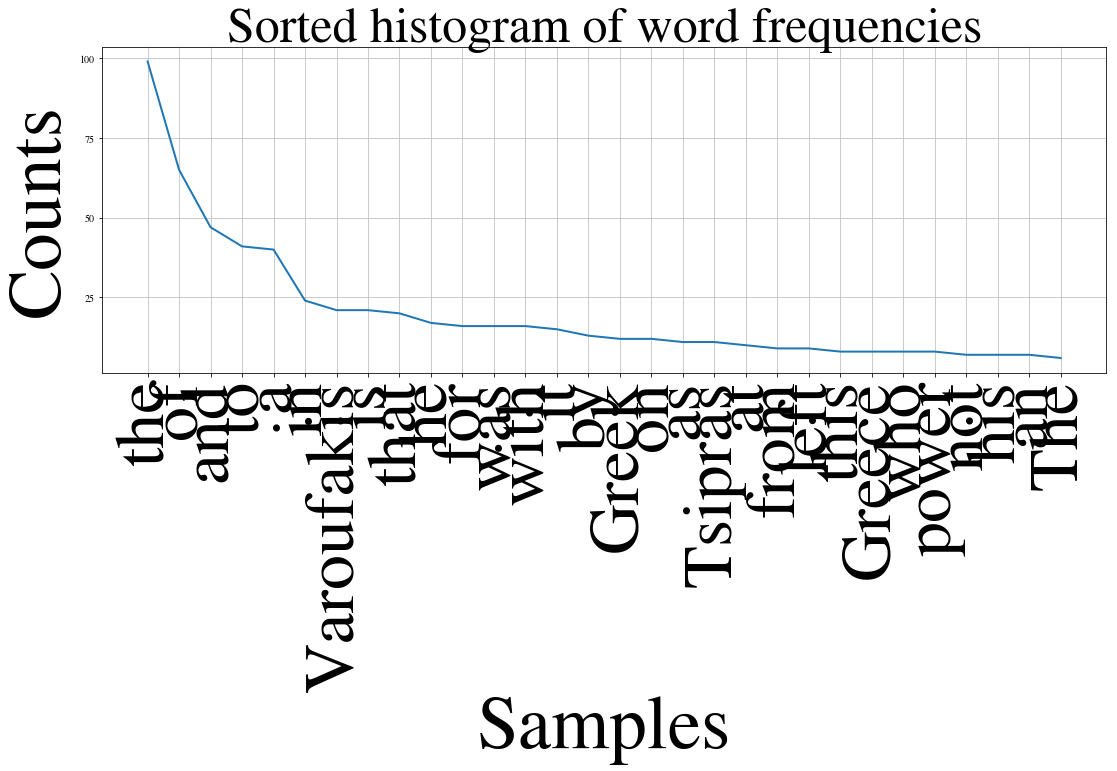

In [55]:
%matplotlib inline
f = plt.figure( figsize=(18, 6))
plt.xlabel('Words', size=75)
plt.ylabel('Counts', size=75)
plt.xticks(size=70)
plt.title('Sorted histogram of word frequencies', size=50)
rcParams['xtick.labelsize'] = 40
rcParams['ytick.labelsize'] = 30
text_article.plot(30)
ax = f.get_axes()



**Exercise:** Plot the word frequencies for the article you cleaned previously.

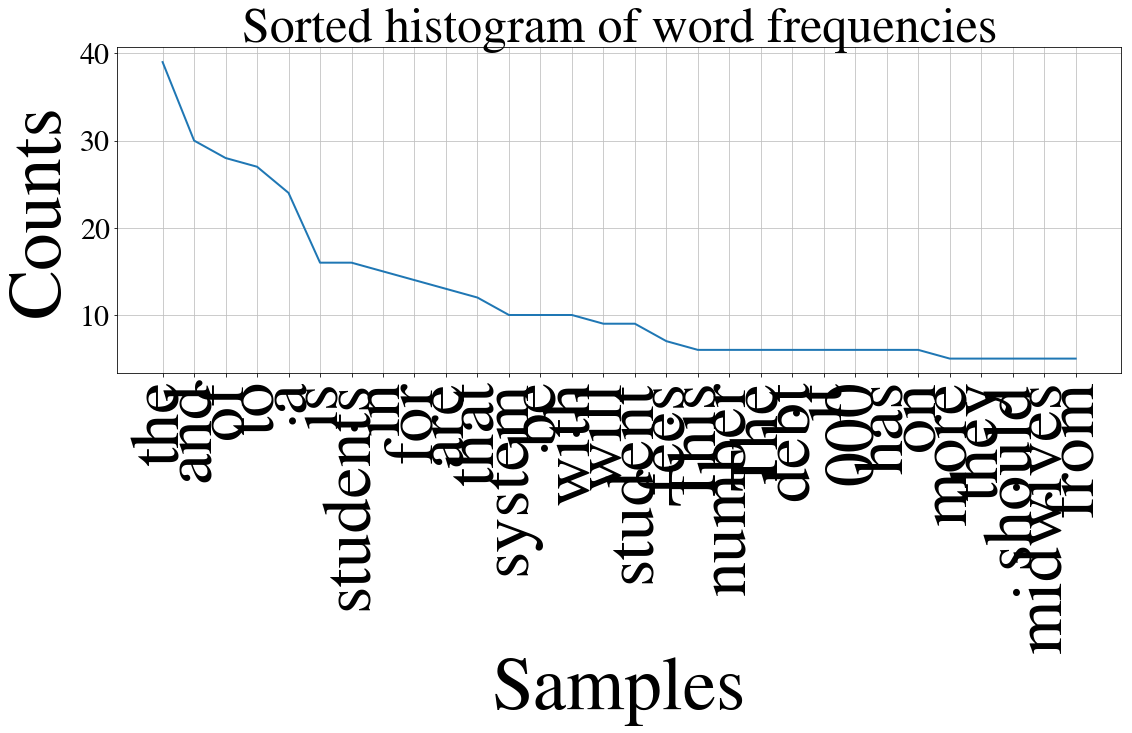

In [72]:
%matplotlib inline
f = plt.figure( figsize=(18, 6))
plt.xlabel('Words', size=75)
plt.ylabel('Counts', size=75)
plt.xticks(size=70)
plt.title('Sorted histogram of word frequencies', size=50)
rcParams['xtick.labelsize'] = 40
rcParams['ytick.labelsize'] = 30
my_text_article.plot(30)
ax = f.get_axes()


## Sentence-level tokenization

In [57]:
nltk.sent_tokenize(cleaned_article)[:5]

['Yanis Varoufakis once bought me a gin and tonic.',
 'His wife once gave me a cup of tea.',
 'While dodging my questions, as finance ministers are obliged to, he never once told me an outright lie.',
 'And Ive hosted him at two all-ticketed events.',
 'I list these transactions because of what I am about to say: that Varoufakis has written one of the greatest political memoirs of all time.']

# Text Cleaning 

## Non-English Words and Spelling Errors

In [58]:
#all valid English words according to this corpus
nltk.corpus.words.words()[:30]

[u'A',
 u'a',
 u'aa',
 u'aal',
 u'aalii',
 u'aam',
 u'Aani',
 u'aardvark',
 u'aardwolf',
 u'Aaron',
 u'Aaronic',
 u'Aaronical',
 u'Aaronite',
 u'Aaronitic',
 u'Aaru',
 u'Ab',
 u'aba',
 u'Ababdeh',
 u'Ababua',
 u'abac',
 u'abaca',
 u'abacate',
 u'abacay',
 u'abacinate',
 u'abacination',
 u'abaciscus',
 u'abacist',
 u'aback',
 u'abactinal',
 u'abactinally']

In [59]:
tokenized_article[:10]

['Yanis',
 'Varoufakis',
 'once',
 'bought',
 'me',
 'a',
 'gin',
 'and',
 'tonic',
 'His']

In [60]:
valid_words = set(word for word in tokenized_article[:10] if  word.lower() in nltk.corpus.words.words())
valid_words

{'His', 'a', 'and', 'bought', 'gin', 'me', 'once', 'tonic'}

## Stopwords

Notice that the **collection of elements from the text comprises of elements which are not all words**. 

Some words may be misspelled as well in which case we might want to take them out. 

Below is an example of how we can extract only words from a given text that appear in a dictionary from a corpus. This command is not something you want to execute on  a large corpus though since it is slow:

There is also a corpus of **stopwords**, that is, high-frequency words such as: the, to etc that we sometimes want to filter out of a document before further processing. 

Stopwords usually have little lexical content or meaning, and their presence in a text thus fails to distinguish
it from other texts.

In [61]:
from nltk.corpus import stopwords
stopwords = stopwords.words('english')
stopwords[0:30]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u"you're",
 u"you've",
 u"you'll",
 u"you'd",
 u'your',
 u'yours',
 u'yourself',
 u'yourselves',
 u'he',
 u'him',
 u'his',
 u'himself',
 u'she',
 u"she's",
 u'her',
 u'hers',
 u'herself',
 u'it',
 u"it's",
 u'its',
 u'itself']

We can remove all the stop words from our list of tokens:

In [62]:
print tokenized_article[:100]
[word for word in tokenized_article if word.lower() not in stopwords][:30]

['Yanis', 'Varoufakis', 'once', 'bought', 'me', 'a', 'gin', 'and', 'tonic', 'His', 'wife', 'once', 'gave', 'me', 'a', 'cup', 'of', 'tea', 'While', 'dodging', 'my', 'questions', 'as', 'finance', 'ministers', 'are', 'obliged', 'to', 'he', 'never', 'once', 'told', 'me', 'an', 'outright', 'lie', 'And', 'Ive', 'hosted', 'him', 'at', 'two', 'all', 'ticketed', 'events', 'I', 'list', 'these', 'transactions', 'because', 'of', 'what', 'I', 'am', 'about', 'to', 'say', 'that', 'Varoufakis', 'has', 'written', 'one', 'of', 'the', 'greatest', 'political', 'memoirs', 'of', 'all', 'time', 'It', 'stands', 'alongside', 'Alan', 'Clarks', 'for', 'frankness', 'Denis', 'Healeys', 'for', 'attacks', 'on', 'former', 'allies', 'and', 'as', 'a', 'manual', 'for', 'exploring', 'the', 'perils', 'of', 'statecraft', 'will', 'probably', 'gain', 'the', 'same', 'stature']


['Yanis',
 'Varoufakis',
 'bought',
 'gin',
 'tonic',
 'wife',
 'gave',
 'cup',
 'tea',
 'dodging',
 'questions',
 'finance',
 'ministers',
 'obliged',
 'never',
 'told',
 'outright',
 'lie',
 'Ive',
 'hosted',
 'two',
 'ticketed',
 'events',
 'list',
 'transactions',
 'say',
 'Varoufakis',
 'written',
 'one',
 'greatest']

**Exercise:** Create another Text object from the article in the previous exercises which this time has all the stopwords removed from it and plot the 30 most frequently occuring words:

['niversity', 'tuition', 'fees', 'are', 'back', 'in', 'the', 'spotlight', 'Labours', 'manifesto', 'pledge', 'to', 'abolish', 'fees', 'saw', 'a', 're', 'energised', 'student', 'constituency', 'help', 'put', 'paid', 'to', 'expectations', 'of', 'a', 'Conservative', 'majority', 'Now', 'Conservative', 'political', 'leaders', 'are', 'scrambling', 'to', 'respond', 'to', 'the', 'issue', 'The', 'overwhelming', 'impression', 'we', 'are', 'left', 'with', 'is', 'that', 'the', 'current', 'system', 'has', 'lost', 'credibility', 'It', 'must', 'be', 'swept', 'away', 'and', 'replaced', 'with', 'one', 'that', 'is', 'both', 'fair', 'and', 'financially', 'sustainable', 'Students', 'and', 'their', 'parents', 'feel', 'they', 'have', 'been', 'unfairly', 'treated', 'by', 'paying', 'the', 'bulk', 'of', 'their', 'higher', 'education', 'costs', 'themselves', 'they', 'are', 'right', 'Under', 'the', '2017', 'system', 'the', 'average']


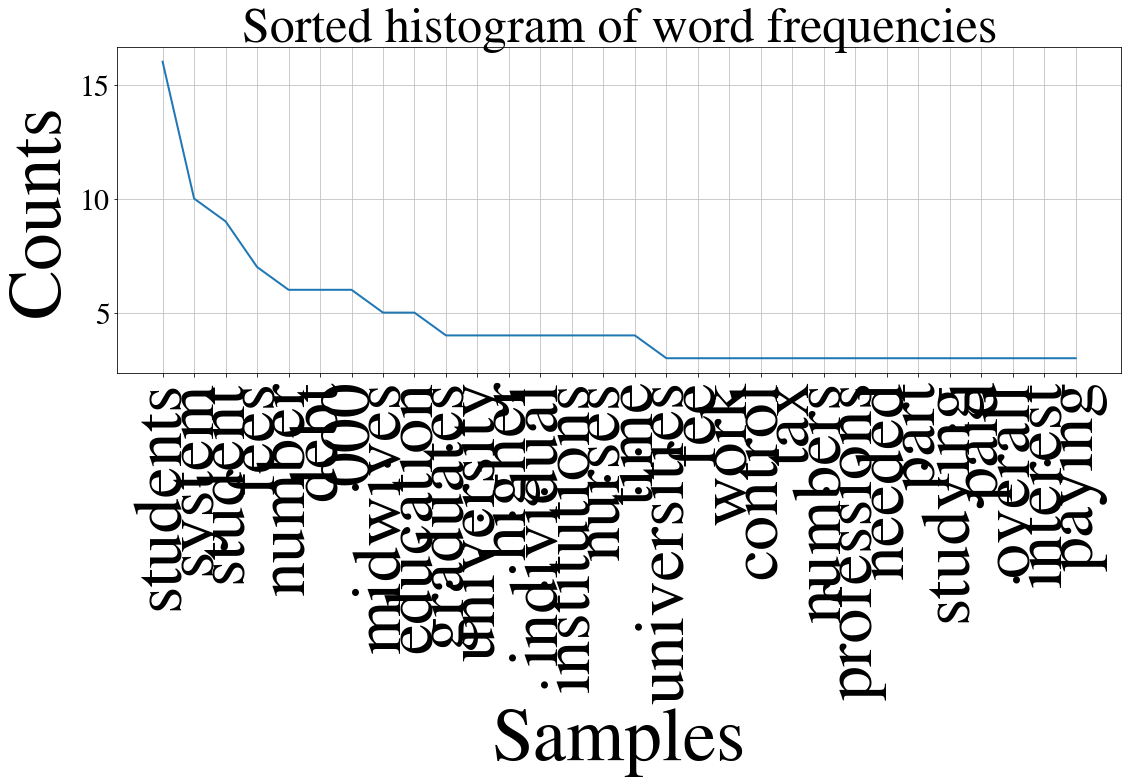

In [80]:
print my_tokenized_article[:100]
no_stops_text = nltk.Text([word for word in my_tokenized_article if word.lower() not in stopwords])
no_stops_text[:30]

%matplotlib inline
f = plt.figure( figsize=(18, 6))
plt.xlabel('Words', size=75)
plt.ylabel('Counts', size=75)
plt.xticks(size=70)
plt.title('Sorted histogram of word frequencies', size=50)
rcParams['xtick.labelsize'] = 40
rcParams['ytick.labelsize'] = 30
no_stops_text.plot(30)
ax = f.get_axes()


### Valid Words Only

If we needed to, we could remove all words from a piece of text which are not spelled correctly or are not words by verifying if they occur in an english dictionary:

*** The code below will take a few minutes to execute ***

In [89]:
print len(tokenized_article)
tokenized_article[:10]

1565


['Yanis',
 'Varoufakis',
 'once',
 'bought',
 'me',
 'a',
 'gin',
 'and',
 'tonic',
 'His']

In [92]:
valid_words = [word for word in tokenized_article if  word.lower() in nltk.corpus.words.words()]
print valid_words[:100]

['once', 'bought', 'me', 'a', 'gin', 'and', 'tonic', 'His', 'wife', 'once', 'gave', 'me', 'a', 'cup', 'of', 'tea', 'While', 'my', 'as', 'finance', 'are', 'obliged', 'to', 'he', 'never', 'once', 'told', 'me', 'an', 'outright', 'lie', 'And', 'him', 'at', 'two', 'all', 'I', 'list', 'these', 'because', 'of', 'what', 'I', 'am', 'about', 'to', 'say', 'that', 'written', 'one', 'of', 'the', 'political', 'of', 'all', 'time', 'It', 'alongside', 'Alan', 'for', 'frankness', 'for', 'on', 'former', 'allies', 'and', 'as', 'a', 'manual', 'for', 'exploring', 'the', 'of', 'statecraft', 'will', 'probably', 'gain', 'the', 'same', 'stature', 'as', 'biography', 'of', 'B', 'Click', 'here', 'for', 'the', 'Yet', 'account', 'of', 'the', 'crisis', 'that', 'scarred', 'between', 'and', 'today', 'also', 'in']


We can from this, if we wish, create a vocabulary of the words used in a given text:

In [97]:
valid_words_lower = [ word.lower() for word in valid_words]

In [98]:
valid_words_lower

['once',
 'bought',
 'me',
 'a',
 'gin',
 'and',
 'tonic',
 'his',
 'wife',
 'once',
 'gave',
 'me',
 'a',
 'cup',
 'of',
 'tea',
 'while',
 'my',
 'as',
 'finance',
 'are',
 'obliged',
 'to',
 'he',
 'never',
 'once',
 'told',
 'me',
 'an',
 'outright',
 'lie',
 'and',
 'him',
 'at',
 'two',
 'all',
 'i',
 'list',
 'these',
 'because',
 'of',
 'what',
 'i',
 'am',
 'about',
 'to',
 'say',
 'that',
 'written',
 'one',
 'of',
 'the',
 'political',
 'of',
 'all',
 'time',
 'it',
 'alongside',
 'alan',
 'for',
 'frankness',
 'for',
 'on',
 'former',
 'allies',
 'and',
 'as',
 'a',
 'manual',
 'for',
 'exploring',
 'the',
 'of',
 'statecraft',
 'will',
 'probably',
 'gain',
 'the',
 'same',
 'stature',
 'as',
 'biography',
 'of',
 'b',
 'click',
 'here',
 'for',
 'the',
 'yet',
 'account',
 'of',
 'the',
 'crisis',
 'that',
 'scarred',
 'between',
 'and',
 'today',
 'also',
 'in',
 'a',
 'category',
 'of',
 'its',
 'own',
 'it',
 'is',
 'the',
 'inside',
 'story',
 'of',
 'high',
 'politic



**Exercise:** Your task now is to remove both all non-English words as well as the stopwords from the article in the previous exercises, and plot the frequency of those words.

['niversity', 'tuition', 'fees', 'are', 'back', 'in', 'the', 'spotlight', 'Labours', 'manifesto', 'pledge', 'to', 'abolish', 'fees', 'saw', 'a', 're', 'energised', 'student', 'constituency', 'help', 'put', 'paid', 'to', 'expectations', 'of', 'a', 'Conservative', 'majority', 'Now', 'Conservative', 'political', 'leaders', 'are', 'scrambling', 'to', 'respond', 'to', 'the', 'issue', 'The', 'overwhelming', 'impression', 'we', 'are', 'left', 'with', 'is', 'that', 'the', 'current', 'system', 'has', 'lost', 'credibility', 'It', 'must', 'be', 'swept', 'away', 'and', 'replaced', 'with', 'one', 'that', 'is', 'both', 'fair', 'and', 'financially', 'sustainable', 'Students', 'and', 'their', 'parents', 'feel', 'they', 'have', 'been', 'unfairly', 'treated', 'by', 'paying', 'the', 'bulk', 'of', 'their', 'higher', 'education', 'costs', 'themselves', 'they', 'are', 'right', 'Under', 'the', '2017', 'system', 'the', 'average']


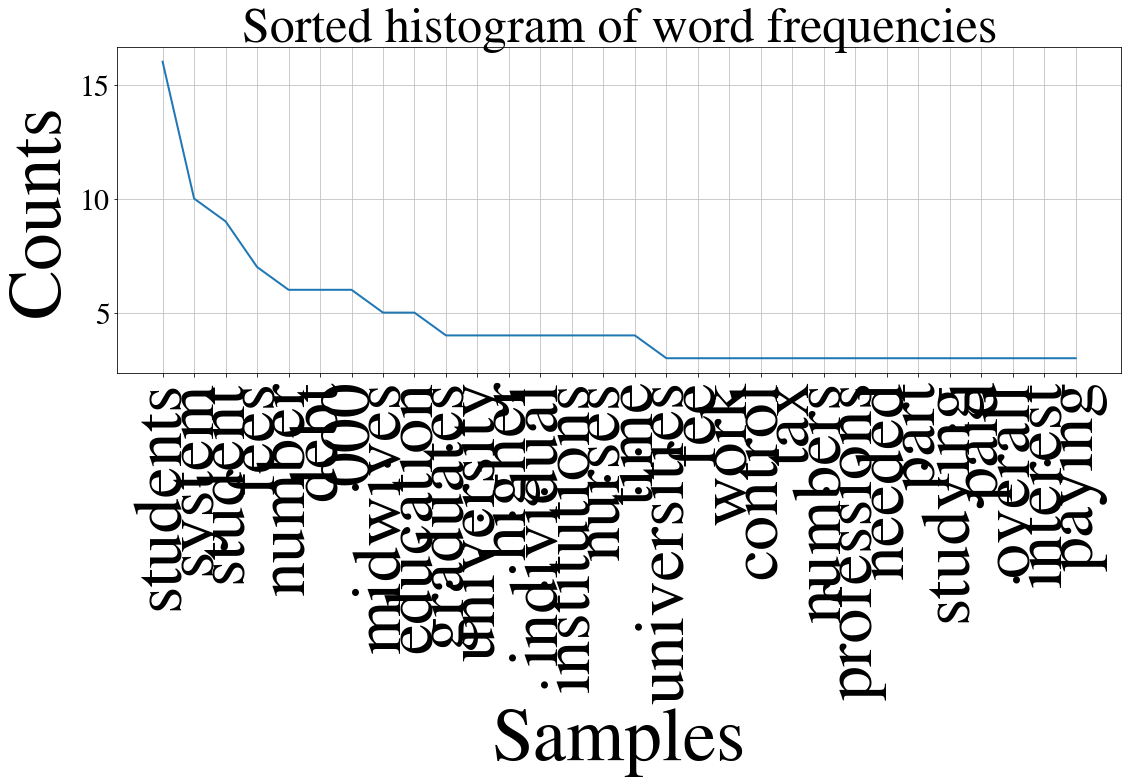

In [99]:
print my_tokenized_article[:100]
no_stops_text = nltk.Text([word for word in my_tokenized_article if word.lower() not in stopwords])
no_stops_text[:30]

%matplotlib inline
f = plt.figure( figsize=(18, 6))
plt.xlabel('Words', size=75)
plt.ylabel('Counts', size=75)
plt.xticks(size=70)
plt.title('Sorted histogram of word frequencies', size=50)
rcParams['xtick.labelsize'] = 40
rcParams['ytick.labelsize'] = 30
no_stops_text.plot(30)
ax = f.get_axes()


### WordClouds

WordClouds are very good at showing visually what the most common words are in the text. However, they are usually not able to preserve the semantic meaning of the words in a visualisation.

There is interesting scientific research being done into semantic-wordclounds which not only encode and convery word frequencies, but also group and visualise commonly ocurring words together. (http://wordcloud.cs.arizona.edu/faq.html)

In [ ]:
!pip install wordcloud

In [81]:
import random 
import wordcloud
#wordcloud = reload(wordcloud)
from wordcloud import WordCloud, STOPWORDS

In [82]:
def grey_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    return "hsl(0, 0%%, %d%%)" % random.randint(1, 20)

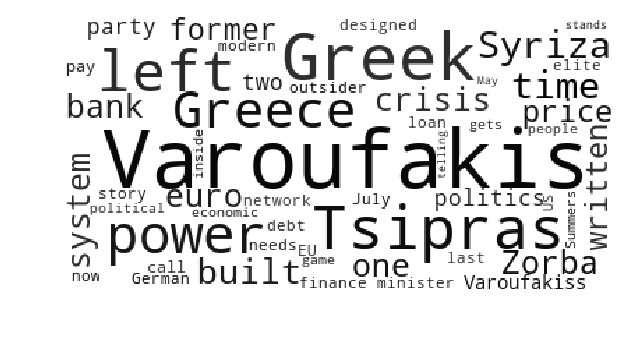

In [83]:
stp = STOPWORDS.copy()
#STOPWORDS.add( "code")
wc = WordCloud(background_color="white", max_words=50,  stopwords=stp)
# generate word cloud
wc.generate(cleaned_article)

# show
plt.figure(figsize=(10,20))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3))
plt.axis("off")
plt.show()



**Exercise:** generate a wordcloud for the article in the previous exercises that you have extracted and cleaned.

# Text Normalisation


Text normalization reduce a word to its base or stem form so that text analysis can be more accurate and meaningful by considering words that differ slightly as being same. There are two startegies for this: stemming and lemmatization.

### Stemming

Stemming is the simplest and computationally least expensive strategy which essentially chops off the ending of words in order to arrive at a normalized form.

In [93]:
from nltk.stem import PorterStemmer
porter_stemmer = PorterStemmer()

text = tokenizer.tokenize('women run running runs ran')
[ porter_stemmer.stem(word) for word in text]

['women', 'run', u'run', u'run', 'ran']

In [94]:
from nltk.stem.snowball import SnowballStemmer
snowball_stemmer = SnowballStemmer('english')

In [95]:
# example stemming
print snowball_stemmer.stem('charge')
print snowball_stemmer.stem('charging')
print snowball_stemmer.stem('charged')
print snowball_stemmer.stem('charges')

charg
charg
charg
charg


In [96]:
# stem the tokens
clean_tokens = tokenizer.tokenize(cleaned_article) 
stemmed_tokens = [snowball_stemmer.stem(t) for t in clean_tokens]
stemmed_tokens[:25]

[u'yani',
 u'varoufaki',
 u'onc',
 u'bought',
 'me',
 'a',
 u'gin',
 u'and',
 u'tonic',
 u'his',
 u'wife',
 u'onc',
 u'gave',
 'me',
 'a',
 u'cup',
 'of',
 u'tea',
 u'while',
 u'dodg',
 'my',
 u'question',
 'as',
 u'financ',
 u'minist']

### Lemmatization

Lemmatization is much more powerful since it employs a dictionary. Lemmatization employs a broader scope of fuzzy word matching.

In [100]:
lemmatizer = nltk.WordNetLemmatizer()

# compare stemmer to lemmatizer
print porter_stemmer.stem('dogs')
print lemmatizer.lemmatize('dogs')

print porter_stemmer.stem('wolves') # Beter for information retrieval and search
print lemmatizer.lemmatize('wolves') # Better for text analysis

# compare stemmer to lemmatizer
print porter_stemmer.stem('automobiles')
print lemmatizer.lemmatize('automobiles')

dog
dog
wolv
wolf
automobil
automobile


WorldNet Lemmatizer accepts the word if it is in the dictionary: 

In [101]:
lemmatizer_tokens = [lemmatizer.lemmatize(t) for t in clean_tokens]
lemmatizer_tokens[:35]

['Yanis',
 'Varoufakis',
 'once',
 'bought',
 'me',
 'a',
 'gin',
 'and',
 'tonic',
 'His',
 'wife',
 'once',
 'gave',
 'me',
 'a',
 'cup',
 'of',
 'tea',
 'While',
 'dodging',
 'my',
 u'question',
 u'a',
 'finance',
 u'minister',
 'are',
 'obliged',
 'to',
 'he',
 'never',
 'once',
 'told',
 'me',
 'an',
 'outright']

**Exercise:** Lemmatize all the words from the article in the previous exercises that you have extracted and cleaned.

In [106]:
my_cleaned_article[:35]

'niversity tuition fees are back in '

In [107]:
my_clean_tokens = tokenizer.tokenize(my_cleaned_article)
my_lemmatizer_tokens = [lemmatizer.lemmatize(t) for t in my_clean_tokens]
my_lemmatizer_tokens[:10]

['niversity',
 'tuition',
 u'fee',
 'are',
 'back',
 'in',
 'the',
 'spotlight',
 'Labours',
 'manifesto']

# Text Semantic Analysis 

The usual NLP pipeline involved in semantic analysis of text consists of the following steps depending on the domain and purpose of analysis: 

1. End of Sentence (EOS) Detection, then
2. Tokenization, then
3. Part-of-Speech (POS) Tagging, then
4. Chunking, then
5. Information Extraction

http://googleresearch.blogspot.co.nz/2016/05/announcing-syntaxnet-worlds-most.html

We have seen what tokenization and normalization are and how they are used at the most basic level of text processing. In order to make meaning of text though, words must be organised into sentences and then words in sentences must be identified according to their types.

The (EOS) Detection part looks at a text and first attempts to segment it based on sentences. It looks for beginning and the end of each sentence in order to give text structure.

In [108]:
text = 'Dr. Sheldon Cooper can be very abraisive to others with what he says. Dr. Sheldon Cooper is sometimes not much liked, but is very amusing.'
sentences = nltk.tokenize.sent_tokenize(text)
sentences

['Dr. Sheldon Cooper can be very abraisive to others with what he says.',
 'Dr. Sheldon Cooper is sometimes not much liked, but is very amusing.']

Following the EOS segmentation, the individual sentences are then tokenized as we have seen before.

In [109]:
tokens = [tokenizer.tokenize(sentence) for sentence in sentences] 
tokens

[['Dr',
  'Sheldon',
  'Cooper',
  'can',
  'be',
  'very',
  'abraisive',
  'to',
  'others',
  'with',
  'what',
  'he',
  'says'],
 ['Dr',
  'Sheldon',
  'Cooper',
  'is',
  'sometimes',
  'not',
  'much',
  'liked',
  'but',
  'is',
  'very',
  'amusing']]

POS tagging is very important for semantic analysis. 

Each word/token is decorated with a part of the speech or linguistic construct it belongs to. 

This can later be used for deriving meaning from a text and for example, for applying machine learning. 

In [110]:
pos_tagged_tokens = [nltk.pos_tag(token) for token in tokens] 
pos_tagged_tokens

[[('Dr', 'NNP'),
  ('Sheldon', 'NNP'),
  ('Cooper', 'NNP'),
  ('can', 'MD'),
  ('be', 'VB'),
  ('very', 'RB'),
  ('abraisive', 'JJ'),
  ('to', 'TO'),
  ('others', 'NNS'),
  ('with', 'IN'),
  ('what', 'WP'),
  ('he', 'PRP'),
  ('says', 'VBZ')],
 [('Dr', 'NNP'),
  ('Sheldon', 'NNP'),
  ('Cooper', 'NNP'),
  ('is', 'VBZ'),
  ('sometimes', 'RB'),
  ('not', 'RB'),
  ('much', 'JJ'),
  ('liked', 'VBN'),
  ('but', 'CC'),
  ('is', 'VBZ'),
  ('very', 'RB'),
  ('amusing', 'JJ')]]

Chunk extraction is a useful step towards achieving information extraction. It generates a parse tree from unstructured text. Given a parse tree of a sentence,  more specific information extraction like named entity recognition and relation extraction can be accomplished as a final step.

In [111]:
pos_tagged_chunks = [nltk.ne_chunk(chunk) for chunk in pos_tagged_tokens] 
pos_tagged_chunks

[Tree('S', [('Dr', 'NNP'), ('Sheldon', 'NNP'), ('Cooper', 'NNP'), ('can', 'MD'), ('be', 'VB'), ('very', 'RB'), ('abraisive', 'JJ'), ('to', 'TO'), ('others', 'NNS'), ('with', 'IN'), ('what', 'WP'), ('he', 'PRP'), ('says', 'VBZ')]),
 Tree('S', [('Dr', 'NNP'), ('Sheldon', 'NNP'), ('Cooper', 'NNP'), ('is', 'VBZ'), ('sometimes', 'RB'), ('not', 'RB'), ('much', 'JJ'), ('liked', 'VBN'), ('but', 'CC'), ('is', 'VBZ'), ('very', 'RB'), ('amusing', 'JJ')])]

The chunks can  be visually portrayed:

In [112]:
pos_tagged_chunks[0].pprint()

(S
  Dr/NNP
  Sheldon/NNP
  Cooper/NNP
  can/MD
  be/VB
  very/RB
  abraisive/JJ
  to/TO
  others/NNS
  with/IN
  what/WP
  he/PRP
  says/VBZ)


In [113]:
pos_tagged_chunks[0].draw()

Information Extraction involves analyzing each chunk and associating it with an additional tag. Information Extraction standardly consists of three subtasks: Named Entity Recognition, Relation Extraction and Template Filling.


# Text Sentiment Analysis 

### TextBlob - Simplified NLP


> TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

TextBlob stands on the giant shoulders of NLTK and pattern, and plays nicely with both.

Features:

    Noun phrase extraction
    Part-of-speech tagging
    Sentiment analysis
    Classification (Naive Bayes, Decision Tree)
    Language translation and detection powered by Google Translate
    Tokenization (splitting text into words and sentences)
    Word and phrase frequencies
    Parsing
    n-grams
    Word inflection (pluralization and singularization) and lemmatization
    Spelling correction
    Add new models or languages through extensions
    WordNet integration


Source: https://textblob.readthedocs.org/en/dev/

In [ ]:
!pip install TextBlob

In [114]:
from textblob import TextBlob, Word

# identify words
blob = TextBlob('Tom and Jerry are Computer Science students at Massey University in Auckland')
blob.words#a function that we can call on Word


WordList(['Tom', 'and', 'Jerry', 'are', 'Computer', 'Science', 'students', 'at', 'Massey', 'University', 'in', 'Auckland'])

In [115]:
# identify noun phrases
blob.noun_phrases

WordList(['tom', 'jerry', 'computer', u'science students', 'massey', 'auckland'])

In [116]:
# singularize and pluralize - not perfect
blob = TextBlob('I see many trees')
print [word.singularize() for word in blob.words]
print [word.pluralize() for word in blob.words]


['I', 'see', 'many', 'tree']
['we', 'sees', 'manies', 'treess']


## Sentiment Analysis with TextBlob

The textblob.sentiments module contains two sentiment analysis implementations, PatternAnalyzer (based on the pattern library) and NaiveBayesAnalyzer (an NLTK classifier trained on a movie reviews corpus).

The default implementation is PatternAnalyzer, but you can override the analyzer by passing another implementation into a TextBlob’s constructor.

In [117]:
from textblob.sentiments import NaiveBayesAnalyzer, PatternAnalyzer
from textblob import Blobber
tba = Blobber(analyzer=NaiveBayesAnalyzer())

 For instance, the NaiveBayesAnalyzer returns its result as a namedtuple of the form: Sentiment(classification, p_pos, p_neg).

In [118]:
print tba("I love natural language processing. It is very difficult though but I still enjoy it.").sentiment

Sentiment(classification='pos', p_pos=0.9090178756547229, p_neg=0.09098212434527589)


In [119]:
# sentiment analysis
blob = TextBlob('I love natural language processing. It is very difficult though but I still enjoy it.', analyzer=PatternAnalyzer())
blob.sentences 


[Sentence("I love natural language processing."),
 Sentence("It is very difficult though but I still enjoy it.")]

In [120]:
#Polarity ranges from -1 to 1 (1 = positive sentiment). 
#Subjectivity how much opinion is expressed within a given sentence: 0 = objective 1 = subjective
blob.sentiment


Sentiment(polarity=0.0875, subjectivity=0.625)

The sentiment property returns a namedtuple of the form Sentiment(polarity, subjectivity). The polarity score is a float within the range [-1.0, 1.0]. The subjectivity is a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

In [121]:
blob.sentiment.polarity


0.0875

In [122]:
[sent.sentiment.polarity for sent in blob.sentences]


[0.3, -0.125]

In [123]:
# sentiment subjectivity
print TextBlob("I am a really good programmer").sentiment.subjectivity #  subjective
print TextBlob("I am a programmer").sentiment.subjectivity #  objective


0.6
0.0


**Exercise:** Extract each sentence from the article in the previous exercises that you have downloaded and list each sentence with its sentiment.

In [125]:
blob = TextBlob(my_cleaned_article, analyzer=NaiveBayesAnalyzer())
[sent.sentiment.classification for sent in blob.sentences[:3]]


['pos', 'pos', 'pos']

In [126]:
blob = TextBlob(my_cleaned_article, analyzer=PatternAnalyzer())
[sent.sentiment.polarity for sent in blob.sentences[:3]]

[0.0, 0.0, 0.0]

We can train our own sentiment classifiers using TextBlob.

In [127]:
from textblob import TextBlob
from textblob.classifiers import NaiveBayesClassifier
train = [
     ('I love this course.', 'pos'),
     ('This univeristy is an amazing place!', 'pos'),
     ('I feel very good about these assignments.', 'pos'),
     ('I do not like this lab', 'neg'),
     ('I am tired of this semester.', 'neg'),
     ("I can't deal with this anymore", 'neg'),
     ("My lecturer is horrible.", "neg")
     ]


In [132]:
cl = NaiveBayesClassifier(train)
cl.classify("I feel horrible!")


'neg'

In [129]:
#Breaks down text into seperate sentences and analyses them
blob = TextBlob("The course is good. But the stress is horrible.", classifier=cl)
for s in blob.sentences:
    print(s)
    print(s.classify())
    

The course is good.
pos
But the stress is horrible.
neg


**Exercise:** Modify the above training dataset to include an additional class called 'neutral'. Create several sample sentences which represent a neutral sentiment. Train the classifier and test it out against several cases:

In [137]:
my_train = [
     ('I love this course.', 'pos'),
     ('This univeristy is an amazing place!', 'neutral'),
     ('I feel very good about these assignments.', 'pos'),
     ('I do not like this lab', 'neutral'),
     ('I am tired of this semester.', 'neg'),
     ("I can't deal with this anymore", 'neutral'),
     ("My lecturer is horrible.", "neg")
     ]


In [138]:
my_cl = NaiveBayesClassifier(my_train)
#Breaks down text into seperate sentences and analyses them
my_blob = TextBlob("The course is good. But the stress is horrible. This is a good day.", classifier=my_cl)
for s in my_blob.sentences:
    print(s)
    print(s.classify())

The course is good.
pos
But the stress is horrible.
neg
This is a good day.
neutral


Adding neutral comments to a small dataset can stuff up other analysis

In [139]:
blob = TextBlob("The course is ok. But the stress is horrible.", classifier=cl)
for s in blob.sentences:
    print(s)
    print(s.classify())
    

The course is ok.
pos
But the stress is horrible.
neg


# Text Feature Extraction 

## Collocations and n-grams

A collocation is a sequence of words that occur together unusually often. Examples: *red
wine*, *cosmetic surgery*, *large house* or a verbal phrase like *pick up*. 

The above are examples of bigrams, but of course this can be expanded to n-grams. 

n-gram models are very effective in modeling language data. This is a core part in statistical language applications. While n-gram analysis is a crucial part of many of the exiting applications NLP models such as machine translation applications, they are also complemented with other models such as Bayesian inference.
 
To get a handle on collocations, we start off by extracting from a text a list of word
pairs, also known as bigrams. This is easily accomplished with the function bigrams():

In [140]:
from nltk import bigrams
bgrs = bigrams(['more', 'is', 'said', 'than', 'done'])

for i in range(4):
    print bgrs.next()

('more', 'is')
('is', 'said')
('said', 'than')
('than', 'done')


Now, collocations are essentially just frequent bigrams or n-grams.

Below is an example of performing collocation analysis in order to draw out some meaning from the text by performing 2 and 3 word collocation analysis: 



In [141]:
from nltk.collocations import *

#tokenized_article = [word for word in tokenized_article if word not in stopwords]
bigram_measures = nltk.collocations.BigramAssocMeasures()


# change this to read in your data
finder = BigramCollocationFinder.from_words(tokenized_article)

# only bigrams that appear 2+ times
finder.apply_freq_filter(2) 

# return the 10 n-grams with the highest PMI
print "Bigram analysis"
print finder.nbest(bigram_measures.pmi, 15) 

Bigram analysis
[('detailed', 'descriptions'), ('most', 'accurate'), ('finance', 'ministers'), ('gives', 'one'), ('ever', 'written'), ('has', 'been'), ('an', 'outsider'), ('not', 'only'), ('power', 'ever'), ('modern', 'power'), ('would', 'have'), ('In', 'this'), ('desire', 'for'), ('together', 'with'), ('with', 'those')]


In [142]:
# change this to read in your data
finder = nltk.collocations.TrigramCollocationFinder.from_words(tokenized_article)

# only trigrams that appear 2+ times
finder.apply_freq_filter(2) 

trigram_measures = nltk.collocations.TrigramAssocMeasures()

print "Trigram analysis"
print finder.nbest(trigram_measures.pmi, 15) 

Trigram analysis
[('modern', 'power', 'ever'), ('power', 'ever', 'written'), ('Varoufakis', 'gives', 'one'), ('accurate', 'and', 'detailed'), ('and', 'detailed', 'descriptions'), ('most', 'accurate', 'and'), ('detailed', 'descriptions', 'of'), ('French', 'and', 'German'), ('descriptions', 'of', 'modern'), ('gives', 'one', 'of'), ('the', 'most', 'accurate'), ('Varoufakis', 'not', 'only'), ('revelation', 'is', 'that'), ('of', 'modern', 'power'), ('at', 'the', 'time')]


**Exercise:** Perform bigram and trigram analysis of the article in the previous exercises that you have downloaded and list the 15 most commonly occuring.

In [144]:
#my_cleaned_article
#my_clean_tokens

bigram_measures = nltk.collocations.BigramAssocMeasures()


# change this to read in your data
finder = BigramCollocationFinder.from_words(my_clean_tokens)

# only bigrams that appear 2+ times
finder.apply_freq_filter(2) 

# return the 10 n-grams with the highest PMI
print "Bigram analysis"
print finder.nbest(bigram_measures.pmi, 15)

Bigram analysis
[('part', 'time'), ('higher', 'education'), ('Read', 'more'), ('50', '000'), ('average', 'debt'), ('tuition', 'fees'), ('government', 'should'), ('individual', 'institutions'), ('number', 'control'), ('will', 'find'), ('current', 'system'), ('there', 'should'), ('resulted', 'in'), ('This', 'has'), ('graduates', 'will')]


In [143]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(my_clean_tokens)

# only trigrams that appear 2+ times
finder.apply_freq_filter(2) 

trigram_measures = nltk.collocations.TrigramAssocMeasures()

print "Trigram analysis"
print finder.nbest(trigram_measures.pmi, 15) 

Trigram analysis
[('part', 'time', 'students'), ('there', 'should', 'be'), ('nurses', 'and', 'midwives'), ('of', 'part', 'time'), ('the', 'current', 'system'), ('the', 'number', 'of')]


# TF-IDF


Term-frequency can offer a good representation of textual information/content in documents as seen above.

However, the main problem with the term-frequency approach is that it elevates frequent terms and demotes rare terms which can, and often are more informative than the high frequency terms. 

When considering a document classification problem and the need to extract meaningful features from many documents, intuition informs us then that a terms that occur most often in many documents are probably not the best discriminators. Would we really want a feature that in a classification problem, emphasizes a term that is found across the entire corpus of all your documents?

TF-IDF addresses this. It quantifies the importance of a term to a specific document and also the importance of the term in the entire collection. TF-IDF balances and incorporates both local and global importance of a term.

TF-IDF effectively penalises frequent terms while emphasising rare terms; a term that occurs 100 times more than another isn’t 100 times more important than it. This is why TF-IDF uses the logarithmic scale to achieve this that.

TF-IDF stands for term frequency-inverse document frequency. TF-IDF is a measure of **relevance**.  TF-IDF tends to be more useful than "term frequency" for identifying "important" words in each document (high frequency in that document, low frequency in other documents).

**TF:** measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear more frequently in longer documents. Thus, the term frequency is often normalized by dividing by the document length: 

\begin{equation}
TF(t) = ( \frac{Number\ of\ times\ term\ t\ appears\ in\ a\ document}{Total\ number\ of\ terms\ in\ the\ document})
\end{equation}


**IDF:** calculates the importance of  term. In TF, all terms are considered equally important. However we saw how stop words appear frequently but offer little discriminating value. Therefore, the frequent terms need to be weighted down, while the rarer terms needed to be scaled up: 

\begin{equation}
IDF(t) = 1 + \ln( \frac{Total\ number\ of\ documents}{Number\ of\ documents\ with\ term\ t\ in\ it})
\end{equation}


\begin{equation}
TF-IDF = TF \times IDF
\end{equation}


TF-IDF yields a very large feature vector. Essentially, we create a column to represent every word in the entire training set since we need a vector of equal length, and this becomes the feature for each individual document.

The vector tends to be quite sparse and will thus contain many zeros, since documents will not contain all the words that are found in other documents of the entire corpus. 

When using TF-IDF in conjunction with Information Retrieval Document Clustering, Cosine Similarity is often used as the measure of similarity. Both the TF-IDF calculation and the Cosine Similarity is built-in into scikit-learn, returning 1 minus the cosine of the angle between vectors 'v' and 'u' which is is equal to 1 - (u.v / |u||v|). 0 indicates perfect similarity score and 1.0 indicates a complete opposite score.  

## Document Topic Discovery 

Automatic text summarization reduces a text document in order to create a summary that retains the most important points from the original. 

Due to the increasing problem of information overload, applications and research into interest automatic summarization has also increased and this has become an important area within machine learning and data mining.

Summarization technologies are used today in many industry sectors. Google is the best example. But news and media outlets also heavily use these technologies.

In [ ]:
!pip install lda

Latent Dirichlet Allocation (LDA) is a powerful algorithm which can automatically discover topics from sentences and thus, both summerise document and extract potentially meaningful features.

LDA defines each topic as a bag of words, though it does not determine what the topic is. You have to label the topics as you deem fit.

The algorithm is essentially iterative. It will check and update topic assignments, looping through each word in every document. For each word, its topic assignment is updated based on two criteria:

    How prevalent is that word across topics?

    How prevalent are topics in the document?
    

Sources for extra info:

http://chrisstrelioff.ws/sandbox/2014/11/13/getting_started_with_latent_dirichlet_allocation_in_python.html
https://www.analyticsvidhya.com/blog/2016/08/beginners-guide-to-topic-modeling-in-python/
http://blog.echen.me/2011/06/27/topic-modeling-the-sarah-palin-emails/


Pseudo Algorithm: (adapted from  http://blog.echen.me/2011/08/22/introduction-to-latent-dirichlet-allocation/)

* Suppose we have a set of documents D and each document has a mixture of topics in them.
* We choose a fixed K number of T topics to discover
* We go through each document, and randomly assign each word in the document to one of the K topics. The random assignment defines both a topic representations of all the documents and word distributions of all the topics, though not in an accurate way.
* In order to improve: 
    - for each document d in D:
        - for each word w in d:
            - for each topic t, compute: 
                   1) p(topic t | document d) = the proportion of words in document d that are currently assigned to topic t, and 
                   2) p(word w | topic t) = the proportion of assignments to topic t over all documents that come from this word w. 
                       Reassign w to a new topic, where we choose topic t with probability p(topic t | document d) * p(word w | topic t) (according to our generative model, this is essentially the probability that topic t generated word w, so it makes sense that we resample the current word’s topic with this probability). In other words, in this step, we’re assuming that all topic assignments except for the current word in question are correct, and then updating the assignment of the current word using our model of how documents are generated.
                   
After a number of iterations, eventually a stable state should be reached where the assignments are meaningful. 

These assignments are then used to estimate the topic mixtures of each document (by counting the proportion of words assigned to each topic within that document) and the words associated to each topic (by counting the proportion of words assigned to each topic overall).


In [145]:
stop_words2 = nltk.corpus.stopwords.words('english') + [
    '.',
    ',',
    '--',
    '\'s',
    '?',
    ')',
    '(',
    ':',
    '\'',
    '\'re',
    '"',
    '-',
    '}',
    '{',
    u'—',
    'like',
    'would',
    'may',
    '',
    '``',
    'new'
    ]

def prep(x):
    #return [porter_stemmer.stem(w) for w in nltk.tokenize.word_tokenize(x) if w not in stop_words]
    return [w for w in nltk.tokenize.word_tokenize(x) if w.lower() not in stop_words2]

In [146]:
import lda
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,1]) 
sentences_train = vect.fit_transform( nltk.tokenize.sent_tokenize(cleaned_article) )

In [149]:
# Instantiate an LDA model
model = lda.LDA(n_topics=3, n_iter=1000)
model.fit(sentences_train) # Fit the model 
n_top_words = 15
topic_word = model.topic_word_
for i, topic_dist in enumerate(topic_word):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words-1:-1]
    print('Topic {}: {}'.format(i, ', '.join(topic_words)))

INFO:lda:n_documents: 61
INFO:lda:vocab_size: 578
INFO:lda:n_words: 778
INFO:lda:n_topics: 3
INFO:lda:n_iter: 1000
INFO:lda:<0> log likelihood: -7820
INFO:lda:<10> log likelihood: -6825
INFO:lda:<20> log likelihood: -6754
INFO:lda:<30> log likelihood: -6713
INFO:lda:<40> log likelihood: -6708
INFO:lda:<50> log likelihood: -6696
INFO:lda:<60> log likelihood: -6676
INFO:lda:<70> log likelihood: -6679
INFO:lda:<80> log likelihood: -6643
INFO:lda:<90> log likelihood: -6671
INFO:lda:<100> log likelihood: -6690
INFO:lda:<110> log likelihood: -6692
INFO:lda:<120> log likelihood: -6706
INFO:lda:<130> log likelihood: -6609
INFO:lda:<140> log likelihood: -6642
INFO:lda:<150> log likelihood: -6664
INFO:lda:<160> log likelihood: -6697
INFO:lda:<170> log likelihood: -6656
INFO:lda:<180> log likelihood: -6683
INFO:lda:<190> log likelihood: -6642
INFO:lda:<200> log likelihood: -6633
INFO:lda:<210> log likelihood: -6664
INFO:lda:<220> log likelihood: -6693
INFO:lda:<230> log likelihood: -6637
INFO:lda

Topic 0: greek, left, july, syriza, syrizas, designed, people, face, remains, strategy, referendum, eu, mass, beans, believe
Topic 1: varoufakis, tsipras, power, built, time, written, politics, crisis, party, political, story, elite, modern, needs, game
Topic 2: greece, price, 2015, zorbas, 2010, pay, banks, finance, german, gets, inside, summers, conspirators, debt, told


In [148]:
for i, topic_dist in enumerate(model.topic_word_):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words-1:-1]
    weights = np.sort(topic_dist)[:-n_top_words-1:-1]
    weights = ["%.3f"%item for item in weights]
    #print [str(i) + ' ' + str(j) for i,j in zip(topic_words, weights)] 
    z= [str(tw) + ' ' + str(w) for tw, w in zip(topic_words, weights)] 
    #z = str(zip(topic_words, weights))
    #print z 
    print('Topic {}: {}'.format(i, ', '.join(z)))

Topic 0: varoufakis 0.050, greek 0.040, power 0.027, left 0.020, time 0.017, built 0.017, politics 0.013, crisis 0.013, price 0.013, written 0.013, party 0.013, modern 0.010, july 0.010, political 0.010, compromise 0.007
Topic 1: tsipras 0.044, varoufakis 0.024, 2015 0.016, people 0.012, elite 0.012, finance 0.012, left 0.012, summers 0.012, needs 0.012, inside 0.012, told 0.008, like 0.008, june 0.008, alliances 0.008, events 0.008
Topic 2: greece 0.024, zorbas 0.012, designed 0.012, banks 0.012, syrizas 0.012, euro 0.012, german 0.012, gets 0.012, game 0.012, pay 0.012, 2010 0.012, stands 0.008, debt 0.008, revelation 0.008, economic 0.008


**Exercise:** Perform topic discovery on the article you extracted from the previous exercises. How meaningful are the results? Experiment with different numbers of topics and top ranking words.

# Text Classification 

## Training a Classifier for Sentiment Classification  From Scratch

We will use a sample of Yelp reviews from https://raw.githubusercontent.com/justmarkham/DAT7/master/data/yelp.csv 

Yelp (http://www.yelp.com/) is an American multinational corporation headquartered in San Francisco, California. It publishes crowd-sourced reviews about local businesses.

We will go though the machine learning process, experimenting and tweaking the features until we arrive at a desirable accuracy.

In [150]:
import pandas as pd
import numpy as np
import scipy as sp
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from textblob import TextBlob, Word
from nltk.stem.snowball import SnowballStemmer

/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [152]:
yelp = pd.read_csv("./DataSets/yelp_reviews.csv")


In [153]:
len(yelp)

10000

In [154]:
yelp.head()


,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [155]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]


In [156]:
print 'total dataset size: ',len(yelp_best_worst)


total dataset size:  4086


### Use default CountVectorizer to train entire dataset first and test it against the training set too

Performing training and testing on just the training test gives us an idea of what the upper boundary of classification would be given a particular machine learning algorithm and dataset and is thus a useful exercise. Using the Naive Bayes classifier for this is particularly advantageous because NB is less prone to overfitting and generates a simple liner decision boundary between classes.

In [157]:
X_train = yelp_best_worst.text.values
y_train = yelp_best_worst.stars.values


In [158]:
print X_train.shape
print y_train.shape


(4086,)
(4086,)


In [159]:
#Initialises an object of count vectorizers
# rows are documents, columns are terms (aka "tokens" or "features")
#It adds features to the review to represent all words in the dataset. = sparse matrix.
#most counts will be zero.
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()
train_dtm = vect.fit_transform(X_train)


In [160]:
#We end up with a training dataset of 4086 rows and 19183 features
train_dtm.shape


(4086, 19183)

In [161]:
#number of features
print len(vect.get_feature_names())
print 'Features: ', train_dtm.shape[1]


19183
Features:  19183


In [162]:
# first 500 features
print vect.get_feature_names()[:500]


[u'00', u'000', u'00a', u'00am', u'00pm', u'01', u'02', u'03', u'03342', u'04', u'05', u'06', u'07', u'09', u'0buxoc0crqjpvkezo3bqog', u'0l', u'10', u'100', u'1000', u'1000x', u'1001', u'100s', u'100th', u'101', u'102', u'1030', u'105', u'1070', u'108', u'109', u'10am', u'10ish', u'10min', u'10mins', u'10minutes', u'10pm', u'10th', u'10x', u'10yo', u'11', u'110', u'1100', u'111', u'111th', u'112', u'115', u'115th', u'116', u'118', u'11a', u'11am', u'11p', u'11pm', u'12', u'120', u'128i', u'129', u'12am', u'12oz', u'12pm', u'12th', u'13', u'1300', u'13331', u'13th', u'14', u'140', u'147', u'14lbs', u'15', u'150', u'1500', u'150mm', u'157', u'15am', u'15mins', u'15pm', u'15th', u'16', u'160', u'165', u'169', u'16th', u'17', u'175', u'17p', u'17th', u'18', u'180', u'1800', u'1895', u'18th', u'19', u'1900', u'1913', u'1928', u'1929', u'1930s', u'1940', u'1952', u'1955', u'1956', u'1960', u'1961', u'1968', u'1969', u'1970', u'1978', u'1980', u'1980s', u'1987', u'1990', u'1990s', u'1992', u'

The array will be mostly empty - sparse. eg: first three rows and ten columns

In [163]:
train_dtm[0:3, 0:10].toarray()


array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [164]:
#number of features
print len(vect.get_feature_names())
print 'Features: ', train_dtm.shape[1]


19183
Features:  19183


In [165]:
#We use MultinomialNB since we are dealing with counts
nb = MultinomialNB()
nb.fit(train_dtm, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [166]:
y_pred_class = nb.predict(train_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_train, y_pred_class)


Accuracy:  0.9718551150269212


Anything that approaches this level of accuracy will be regarded as a good classification performance.

In [167]:
print 'F1: ', metrics.f1_score(y_train, y_pred_class)

F1:  0.921715452688904


### Use default CountVectorizer which creates a list of term/frequency features for every review on  a split dataset

In [168]:
# split the new DataFrame into training and testing sets
# Gives us 75 train : 25 test split
X_train, X_test, y_train, y_test = train_test_split(yelp_best_worst.text, yelp_best_worst.stars, random_state=1, train_size=0.75)


In [169]:
print 'training dataset size: ', len(X_train)
print 'test dataset size: ',  len(X_test)


training dataset size:  3064
test dataset size:  1022


In [170]:
print y_train.shape
print y_test.shape


(3064,)
(1022,)


In [171]:
#Initialises an object of count vectorizers
# rows are documents, columns are terms (aka "tokens" or "features")
#It adds features to the review to represent all words (16825) in the dataset. = sparse matrix.
#most counts will be zero.
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer()
train_dtm = vect.fit_transform(X_train)
test_dtm = vect.transform(X_test)


In [172]:
#We end up with a training dataset of 3064 rows and 16825 features
train_dtm.shape


(3064, 16825)

In [173]:
test_dtm.shape

(1022, 16825)

In [174]:
#We use MultinomialNB since we are dealing with counts
nb = MultinomialNB()
nb.fit(train_dtm, y_train)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [175]:
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)


Accuracy:  0.9187866927592955


### Use default CountVectorizer with filtered stopwords 

In [176]:
# remove English stop words
vect = CountVectorizer(stop_words='english')
train_dtm = vect.fit_transform(X_train)
print 'Features: ', train_dtm.shape[1]
test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)


Features:  16528
Accuracy:  0.9158512720156555


### Use default CountVectorizer with filtered stopwords and select top 100

In [177]:
# remove English stop words and only keep 100 features
vect = CountVectorizer(stop_words='english', max_features=100)
train_dtm = vect.fit_transform(X_train)
print 'Features: ', train_dtm.shape[1]
test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)



Features:  100
Accuracy:  0.8698630136986302


**Exercise:** Train a classifier on top 10000 words

In [179]:

vect = CountVectorizer(stop_words='english', max_features=10000)
train_dtm = vect.fit_transform(X_train)
print 'Features: ', train_dtm.shape[1]
test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)



Features:  10000
Accuracy:  0.9246575342465754


**Exercise:** Train a classifier on bigram frequencies 

In [181]:
vect = CountVectorizer(ngram_range=[2,2])
train_dtm = vect.fit_transform(X_train)
print 'Features: ', train_dtm.shape[1]
test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)


Features:  153022
Accuracy:  0.8737769080234834


**Exercise:** Train a classifier on bigrams and restricting to top 10000 

In [182]:
vect = CountVectorizer(ngram_range=[2,2], max_features=10000)
train_dtm = vect.fit_transform(X_train)
print 'Features: ', train_dtm.shape[1]
test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

Features:  10000
Accuracy:  0.9099804305283757


**Exercise:** Train a classifier on bigrams including terms that appear at least 2 times

In [183]:
vect = CountVectorizer(ngram_range=[2,2], min_df=2)
train_dtm = vect.fit_transform(X_train)
print 'Features: ', train_dtm.shape[1]
test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

Features:  35174
Accuracy:  0.9324853228962818


**Exercise:** Train a classifier on word counts, but this time normalise all the words using a SnowballStemmer lemmatizer.

In [ ]:
vect = CountVectorizer(ngram_range=[2,2], min_df=2)
train_dtm = vect.fit_transform(X_train)
print 'Features: ', train_dtm.shape[1]
test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

Passing numeric regular expression into account vectoriser may improve results further. Or use the dictionary to filter out misspelled words. There are a number of other trial and error tweaks to the training that could be performed.

### Use TF-IDF

In [ ]:
# create a document-term matrix using TF-IDF
vect = TfidfVectorizer(stop_words='english',max_features=1000)
#dtm = vect.fit_transform(yelp.text)
#features = vect.get_feature_names()


train_dtm = vect.fit_transform(X_train)
print train_dtm.shape
print 'Features: ', train_dtm.shape[1]
test_dtm = vect.transform(X_test)
nb = MultinomialNB()
nb.fit(train_dtm, y_train)
y_pred_class = nb.predict(test_dtm)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)

**Exercise:** Train a classifier again using TF-IDF features, and this time experiment with different subsets/numbers of features and observe changes in accuracy

### Use LDA

Here is an example of how to generate a list of words associated with five topics for each of the two categories of reviews:

In [184]:
# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,1]) 
sentences_train = vect.fit_transform( X_train[y_train == 1] )

# Instantiate an LDA model
model = lda.LDA(n_topics=2, n_iter=200)
model.fit(sentences_train) # Fit the model 
n_top_words = 5
topic_word = model.topic_word_
for i, topic_dist in enumerate(model.topic_word_):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words-1:-1]
    weights = np.sort(topic_dist)[:-n_top_words-1:-1]
    weights = ["%.3f"%item for item in weights]
    z= [str(tw) + ' ' + str(w) for tw, w in zip(topic_words, weights)] 
    print('Topic {}: {}'.format(i, ', '.join(z)))
    

INFO:lda:n_documents: 565
INFO:lda:vocab_size: 7236
INFO:lda:n_words: 37722
INFO:lda:n_topics: 2
INFO:lda:n_iter: 200
INFO:lda:<0> log likelihood: -357066
INFO:lda:<10> log likelihood: -330780
INFO:lda:<20> log likelihood: -327453
INFO:lda:<30> log likelihood: -326225
INFO:lda:<40> log likelihood: -325369
INFO:lda:<50> log likelihood: -324619
INFO:lda:<60> log likelihood: -324430
INFO:lda:<70> log likelihood: -324049
INFO:lda:<80> log likelihood: -323917
INFO:lda:<90> log likelihood: -323950
INFO:lda:<100> log likelihood: -323713
INFO:lda:<110> log likelihood: -323235
INFO:lda:<120> log likelihood: -323342
INFO:lda:<130> log likelihood: -323371
INFO:lda:<140> log likelihood: -323296
INFO:lda:<150> log likelihood: -323002
INFO:lda:<160> log likelihood: -323017
INFO:lda:<170> log likelihood: -323164
INFO:lda:<180> log likelihood: -323205
INFO:lda:<190> log likelihood: -323240
INFO:lda:<199> log likelihood: -323160


Topic 0: food 0.025, place 0.017, like 0.015, good 0.014, ordered 0.009
Topic 1: time 0.010, just 0.008, service 0.008, minutes 0.008, order 0.008


In [185]:
# Instantiate a count vectorizer with two additional parameters
vect = CountVectorizer(stop_words='english', ngram_range=[1,1]) 
sentences_train = vect.fit_transform( X_train[y_train == 5] )

# Instantiate an LDA model
model = lda.LDA(n_topics=2, n_iter=200)
model.fit(sentences_train) # Fit the model 
n_top_words = 5
topic_word = model.topic_word_
for i, topic_dist in enumerate(model.topic_word_):
    topic_words = np.array(vect.get_feature_names())[np.argsort(topic_dist)][:-n_top_words-1:-1]
    weights = np.sort(topic_dist)[:-n_top_words-1:-1]
    weights = ["%.3f"%item for item in weights]
    z= [str(tw) + ' ' + str(w) for tw, w in zip(topic_words, weights)] 
    print('Topic {}: {}'.format(i, ', '.join(z)))

INFO:lda:n_documents: 2499
INFO:lda:vocab_size: 14316
INFO:lda:n_words: 131423
INFO:lda:n_topics: 2
INFO:lda:n_iter: 200
INFO:lda:<0> log likelihood: -1218798
INFO:lda:<10> log likelihood: -1153393
INFO:lda:<20> log likelihood: -1142757
INFO:lda:<30> log likelihood: -1134788
INFO:lda:<40> log likelihood: -1130709
INFO:lda:<50> log likelihood: -1127574
INFO:lda:<60> log likelihood: -1125689
INFO:lda:<70> log likelihood: -1123937
INFO:lda:<80> log likelihood: -1122784
INFO:lda:<90> log likelihood: -1120723
INFO:lda:<100> log likelihood: -1119815
INFO:lda:<110> log likelihood: -1119070
INFO:lda:<120> log likelihood: -1118566
INFO:lda:<130> log likelihood: -1117838
INFO:lda:<140> log likelihood: -1117813
INFO:lda:<150> log likelihood: -1117877
INFO:lda:<160> log likelihood: -1117450
INFO:lda:<170> log likelihood: -1117844
INFO:lda:<180> log likelihood: -1117938
INFO:lda:<190> log likelihood: -1117308
INFO:lda:<199> log likelihood: -1117600


Topic 0: food 0.018, good 0.014, place 0.013, great 0.012, love 0.009
Topic 1: great 0.011, place 0.009, just 0.007, time 0.007, like 0.007


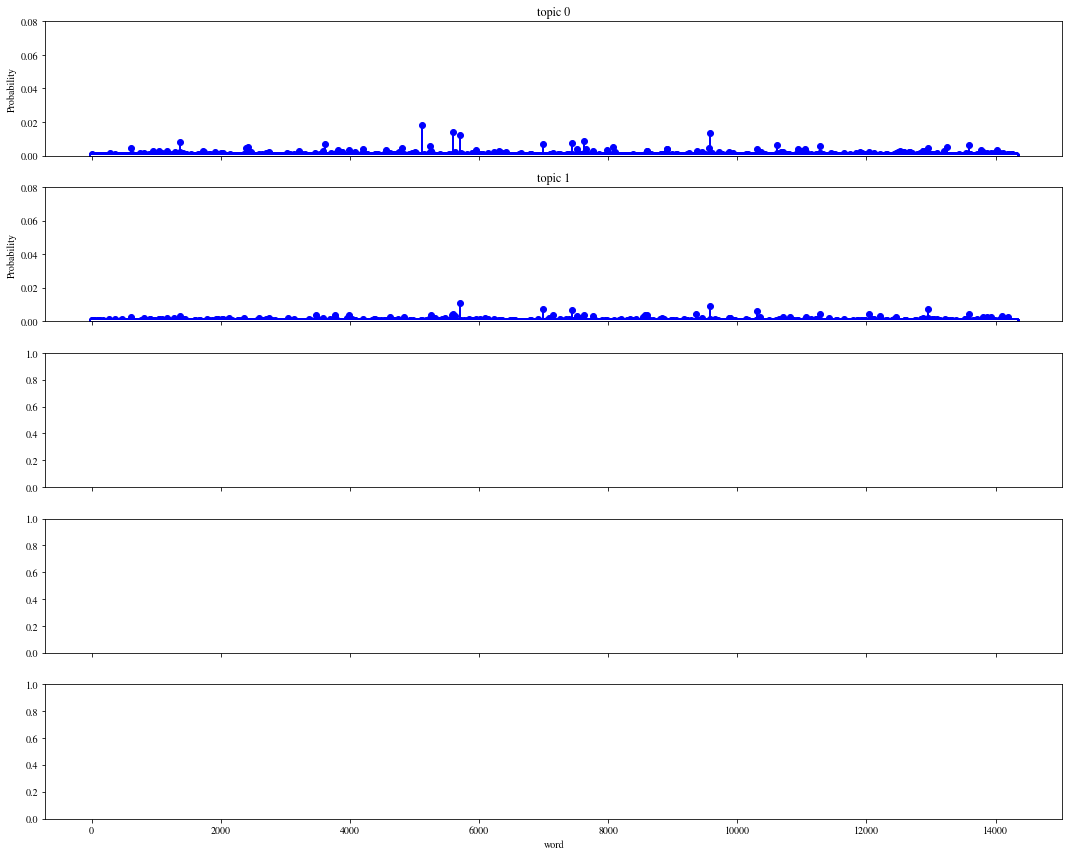

In [186]:
rcParams['xtick.labelsize'] = 10
rcParams['ytick.labelsize'] = 10

f, ax= plt.subplots(5, 1, figsize=(15, 12), sharex=True)
for i, k in enumerate(range(2)):
    ax[i].stem(topic_word[k,:], linefmt='b-', markerfmt='bo', basefmt='w-')
    ax[i].set_ylim(0, 0.08)
    ax[i].set_ylabel("Probability")
    ax[i].set_title("topic {}".format(k))

ax[4].set_xlabel("word")



plt.tight_layout()
plt.show()

In [ ]:
doc_topic = model.doc_topic_
rcParams['xtick.labelsize'] = 20
rcParams['ytick.labelsize'] = 20

f, ax= plt.subplots(5, 1, figsize=(25, 15), sharex=True)
for i, k in enumerate(range(5)):
    ax[i].stem(doc_topic[k,:], linefmt='r-', markerfmt='ro', basefmt='w-')
    ax[i].set_xlim(-0.5, 2.5)
    ax[i].set_ylim(0, 1)
    ax[i].set_ylabel("Probability")
    ax[i].set_title("Document {}".format(k))

ax[4].set_xlabel("Topic")

plt.tight_layout()
plt.show()

In [ ]:
y_train[:5]

**Exercise:** Consider how you would represent this as a feature for a classification problem.

### Alternative Features Engineering Techinques

We are now going to continue experimenting with this problem and get more creative with the "feature engineering" component in the hope that we generate new features which are more discriminative in their predictive strength of the target class labels.

In [ ]:
# understanding the apply method
yelp['length'] = yelp.text.apply(len)


In [ ]:
yelp.head()

In [ ]:
# define a function that accepts text and returns the polarity
def detect_sentiment(text):
    return TextBlob(text.decode('utf-8')).sentiment.polarity


# create a new DataFrame column for sentiment
yelp['sentiment'] = yelp.text.apply(detect_sentiment)
yelp.head()

In [ ]:
# boxplot of sentiment grouped by stars
yelp.boxplot(column='sentiment', by='stars', figsize=(25,10))
plt.xticks(fontsize='large')
plt.yticks(fontsize='large')


In [ ]:
yelp_best_worst.head()


In [ ]:
# create a new DataFrame that only contains the 5-star and 1-star reviews
yelp_best_worst = yelp[(yelp.stars==5) | (yelp.stars==1)]

# split the new DataFrame into training and testing sets
feature_cols = ['sentiment', 'cool', 'useful', 'funny', 'length']
X = yelp_best_worst[feature_cols]
y = yelp_best_worst.stars


This will now be our classification dataset features:

In [ ]:
X.head()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


In [ ]:
print 'Features: ', X_train.shape[1]
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_class = nb.predict(X_test)
print 'Accuracy: ', metrics.accuracy_score(y_test, y_pred_class)


**Exercise:** Add a new feature called subjectivity which represents the subjectivity of the review. Train a classifier with the new feature and observe changes in accuracy.

---


# Information Retreival 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Assume thats the data we have (4 short documents)
data = [
    'I like tennis and swimming',
    'I love swimming and skiing',
    'I prefer skiing over tennis',
    'Playing sport is awful'
]

# Vectorise the data
vec = TfidfVectorizer()
X = vec.fit_transform(data) # `X` will now be a TF-IDF representation of the data, the first row of `X` corresponds to the first sentence in `data`

# Calculate the pairwise cosine similarities (depending on the amount of data that you are going to have this could take a while)
S = cosine_similarity(X)
S

**Exercise:** Complete the function below which takes the target text, a k number of requested closest texts, the tf-idf matrix and the original dataset. It should return the k number of closest texts to the target text.

In [ ]:
def select_k_closest(target, k, distance_matrix, data):
    
    # YOUR CODE HERE

    
    return result
    

In [ ]:
k = 2
target = 0
select_k_closest(target, k, S, data)
#should return
#[(0.43395520933080783, 'I love swimming and skiing'),
#(0.20392689827876312, 'I prefer skiing over tennis')]

**Exercise:** Use tf-idf and the cosine similarity to find the 3 closest reviews to the below review.

In [ ]:
yelp['text'].values[0]

In [ ]:
# YOUR CODE HERE

# Calculate the pairwise cosine similarities (depending on the amount of data that you are going to have this could take a while)


In [ ]:
k = 3
target = 0
select_k_closest(target, k, S, yelp['text'].values)
#should return:

**Exercise:** Extend the above exercise and use tf-idf and the cosine similarity to classify the test set from the previous classification problem involving 1 and 5 start reviews. 

**Exercise:** Combine both the tf-idf and the cosine similarity classification and the trained classifiers from previous examples in order to perform the classification of the yelp dataset from the above example.

In [ ]:
%%javascript
require(['base/js/utils'],
function(utils) {
   utils.load_extensions('calico-spell-check', 'calico-document-tools', 'calico-cell-tools');
});